In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None
np.random.seed(9)

In [5]:
processed_top5_feature_df = pd.read_pickle("./data/processed_top5_feature_df.pkl")

In [6]:
processed_top5_feature_df.shape

(34593, 9554)

In [7]:
instnm_df = pd.read_pickle("./data/instnm_df.pkl")

In [8]:
instnm_df.shape

(34593, 3)

In [10]:
combined_df = pd.merge(processed_top5_feature_df, instnm_df, on='UNITID')

In [11]:
combined_df.shape

(352777, 9556)

In [52]:
instnm_df.loc[instnm_df['UNITID'] == 430704]

,UNITID,INSTNM,OPEID
Id,,,
114431,430704,Texas College of Traditional Chinese Medicine,3179500


# Completion Rate's

In [46]:
completion_df = combined_df[['UNITID', 'INSTNM', 'COMP_ORIG_YR4_RT']].copy()

In [47]:
grouped_completion_df = completion_df.groupby('UNITID').median()
grouped_completion_df = grouped_completion_df.sort_values(by=['COMP_ORIG_YR4_RT'], ascending=False)
grouped_completion_df[['COMP_ORIG_YR4_RT']].head(5)

,COMP_ORIG_YR4_RT
UNITID,
430704.0,1.0
221670.0,1.0
193751.0,1.0
145628.0,1.0
167093.0,1.0


In [48]:
grouped_completion_df.loc[128902:128902,]

,COMP_ORIG_YR4_RT
UNITID,
128902.0,0.813559


# Strongest Correlation - TUITIONFEE_OUT
### Out-of-state tuition and fees

In [20]:
tuition_df = combined_df[['UNITID', 'INSTNM', 'TUITIONFEE_OUT', 'COMP_ORIG_YR4_RT']].copy()

In [21]:
grouped_tuition_df = tuition_df.groupby('UNITID').median()
grouped_tuition_df = grouped_tuition_df.sort_values(by=['TUITIONFEE_OUT'], ascending=False)
grouped_tuition_df[['TUITIONFEE_OUT']].head(5)

,TUITIONFEE_OUT
UNITID,
128902.0,43990.0
234216.0,43587.0
161086.0,42820.0
160977.0,42800.0
230959.0,42428.0


In [103]:
grouped_tuition_df[['TUITIONFEE_OUT']].tail(5)

,TUITIONFEE_OUT
UNITID,
155140.0,317.5
155326.0,196.0
155618.0,196.0
197221.0,0.0
197027.0,0.0


In [104]:
instnm_df.loc[instnm_df['UNITID'] == 155618]

,UNITID,INSTNM,OPEID
Id,,,
81375,155618,Northwest Kansas Technical College,526700


In [105]:
grouped_completion_df.loc[155618:155618,]

,COMP_ORIG_YR4_RT
UNITID,
155618.0,0.704698


In [69]:
grouped_completion_df.loc[230959:230959,]

,COMP_ORIG_YR4_RT
UNITID,
230959.0,0.783439


In [70]:
top_tuition_dict = {'Institution':['Connecticut College', 'Gibbs College', 'Colby College', 'Bates College', 'Middlebury College'],
                    'TUITIONFEE_OUT':[43990, 43587, 42820, 42800, 42428],
                   'COMP_ORIG_YR4_RT':[0.813559, 0.412048, 0.823009, 0.734104, 0.783439]}

In [71]:
top_tuition_df = pd.DataFrame.from_dict(top_tuition_dict)
top_tuition_df

,Institution,TUITIONFEE_OUT,COMP_ORIG_YR4_RT
0,Connecticut College,43990,0.813559
1,Gibbs College,43587,0.412048
2,Colby College,42820,0.823009
3,Bates College,42800,0.734104
4,Middlebury College,42428,0.783439


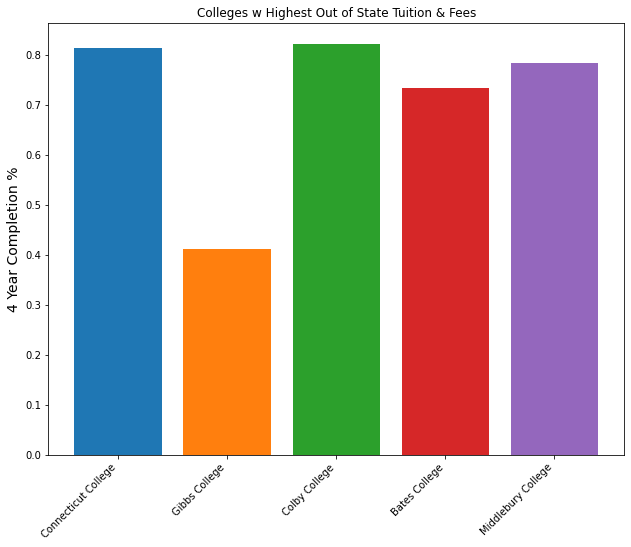

In [109]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_axes([0,0,1,1])
instnm = list(top_tuition_df['Institution'])
completion_pct = top_tuition_df['COMP_ORIG_YR4_RT']
ax.bar(instnm, completion_pct, color=['C0', 'C1', 'C2', 'C3', 'C4'])
plt.xticks(rotation=45, ha='right')
plt.title('Colleges w Highest Out of State Tuition & Fees')
plt.ylabel('4 Year Completion %', fontsize = 14)
plt.show()

# Second Strongest Correlation - COSTT4_A
## Average cost of attendance (academic year institutions)

In [88]:
attendance_cost_df = combined_df[['UNITID', 'INSTNM', 'COSTT4_A']].copy()
grouped_attendance_cost_df = attendance_cost_df.groupby('UNITID').median()
grouped_attendance_cost_df = grouped_attendance_cost_df.sort_values(by=['COSTT4_A'], ascending=False)
grouped_attendance_cost_df[['COSTT4_A']].head(5)

,COSTT4_A
UNITID,
433004.0,72143.0
247649.0,60025.0
195304.0,57240.5
144050.0,56392.5
179867.0,55731.5


In [98]:
instnm_df.loc[instnm_df['UNITID'] == 179867]

,UNITID,INSTNM,OPEID
Id,,,
42000,179867,WASHINGTON UNIVERSITY IN ST LOUIS,252000
48519,179867,WASHINGTON UNIVERSITY IN ST LOUIS,252000
55049,179867,WASHINGTON UNIVERSITY IN ST LOUIS,252000
61694,179867,Washington University in St Louis,252000
68489,179867,Washington University in St Louis,252000
75318,179867,Washington University in St Louis,252000
82189,179867,Washington University in St Louis,252000
89142,179867,Washington University in St Louis,252000
96252,179867,Washington University in St Louis,252000


In [99]:
grouped_completion_df.loc[179867:179867,]

,COMP_ORIG_YR4_RT
UNITID,
179867.0,0.834525


In [100]:
top_attendance_cost_dict = {'Institution':['American University of Health Sciences', 'Landmark College', 'Sarah Lawrence College', 'University of Chicago', 'Washington University in St. Louis' ],
                    'COSTT4_A':[72143, 60025, 57240.5, 56392.5, 55731.5],
                   'COMP_ORIG_YR4_RT':[0.666667,0.272727, 0.775281,0.846875, 0.834525]}

In [101]:
top_attendance_cost_df = pd.DataFrame.from_dict(top_attendance_cost_dict)
top_attendance_cost_df

,Institution,COSTT4_A,COMP_ORIG_YR4_RT
0,American University of Health Sciences,72143.0,0.666667
1,Landmark College,60025.0,0.272727
2,Sarah Lawrence College,57240.5,0.775281
3,University of Chicago,56392.5,0.846875
4,Washington University in St. Louis,55731.5,0.834525


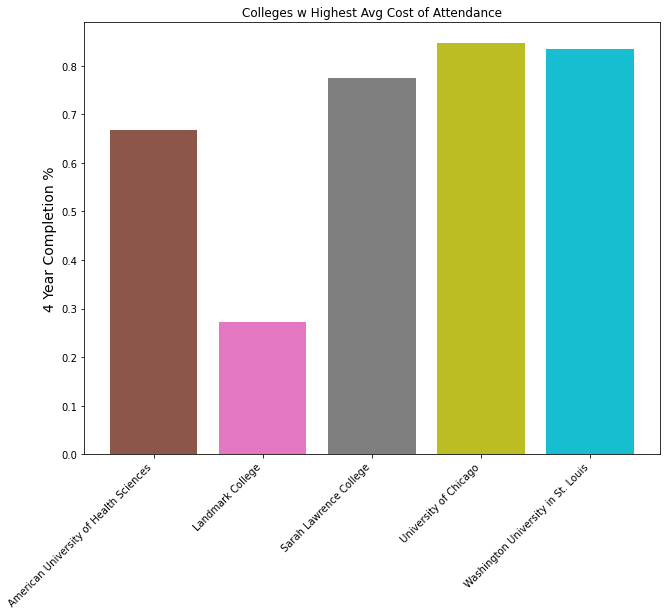

In [111]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_axes([0,0,1,1])
instnm = list(top_attendance_cost_df['Institution'])
completion_pct = top_attendance_cost_df['COMP_ORIG_YR4_RT']
ax.bar(instnm, completion_pct, color=['C5', 'C6', 'C7', 'C8', 'C9'])
plt.xticks(rotation=45, ha='right')
plt.title('Colleges w Highest Avg Cost of Attendance')
plt.ylabel('4 Year Completion %', fontsize = 14)
plt.show()

In [113]:
processed_top5_feature_df['COMP_ORIG_YR4_RT'].describe()

count    34593.000000
mean         0.325147
std          0.206128
min          0.000000
25%          0.156770
50%          0.312364
75%          0.460452
max          1.000000
Name: COMP_ORIG_YR4_RT, dtype: float64

In [115]:
processed_top5_feature_df['TUITIONFEE_OUT'].describe()

count    34593.000000
mean     13940.122850
std       8559.746839
min          0.000000
25%       7250.000000
50%      12339.000000
75%      18400.000000
max      49793.000000
Name: TUITIONFEE_OUT, dtype: float64

In [114]:
processed_top5_feature_df['COSTT4_A'].describe()

count    34593.000000
mean     23325.693984
std      12000.640937
min       2200.000000
25%      13209.000000
50%      20705.000000
75%      30909.000000
max      72143.000000
Name: COSTT4_A, dtype: float64

### Model Performance Comparison Graph

In [1]:
model_perf_dict = {'Model':['Linear', 'Lasso', 'Ridge', 'Linear SVR', 'Nu SVR', 'Decision Tree', 'Random Forest'],
                    'Train':[0.88, 0.49, 0.88, 0, 0.79, 0.85, 0.98],
                   'Test':[0,0.49, 0.81,0, 0.72, 0.78, 0.82]}

In [4]:
model_perf_df = pd.DataFrame.from_dict(model_perf_dict)
model_perf_df

,Model,Train,Test
0,Linear,0.88,0.00
1,Lasso,0.49,0.49
2,Ridge,0.88,0.81
3,Linear SVR,0.00,0.00
4,Nu SVR,0.79,0.72
5,Decision Tree,0.85,0.78
6,Random Forest,0.98,0.82


In [168]:
train_values = [a for a in model_perf_df['Train']]
x_ticks = list(range(1,len(model_perf_df)+1))
x_labels = [a for a in model_perf_df['Model']]

In [169]:
x_labels

['Linear',
 'Lasso',
 'Ridge',
 'Linear SVR',
 'Nu SVR',
 'Decision Tree',
 'Random Forest']

In [170]:
x_ticks

[1, 2, 3, 4, 5, 6, 7]

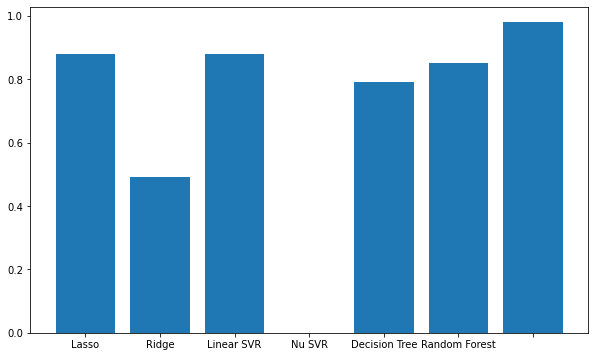

In [171]:
fig,ax = plt.subplots(figsize=(10,6))

ax.bar(x_ticks,train_values)


ax.set_xticklabels(x_labels);


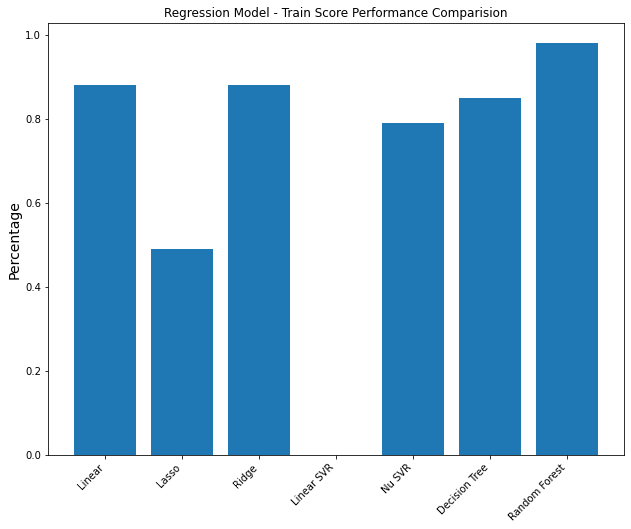

In [150]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_axes([0,0,1,1])
model = list(model_perf_df['Model'])
train = model_perf_df['Train']
test = model_perf_df['Test']
ax.bar(instnm, train)
plt.xticks(rotation=45, ha='right')
plt.title('Regression Model - Train Score Performance Comparision')
plt.ylabel('Percentage', fontsize = 14)
plt.show()

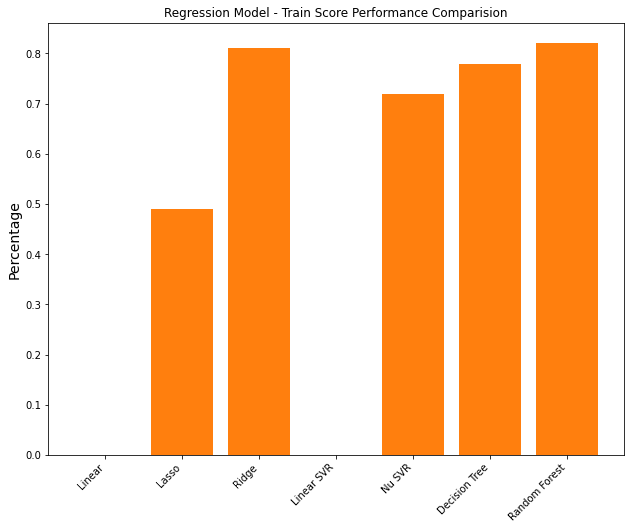

In [152]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_axes([0,0,1,1])
model = list(model_perf_df['Model'])
train = model_perf_df['Train']
test = model_perf_df['Test']
ax.bar(instnm, test, color='C1')
plt.xticks(rotation=45, ha='right')
plt.title('Regression Model - Train Score Performance Comparision')
plt.ylabel('Percentage', fontsize = 14)
plt.show()

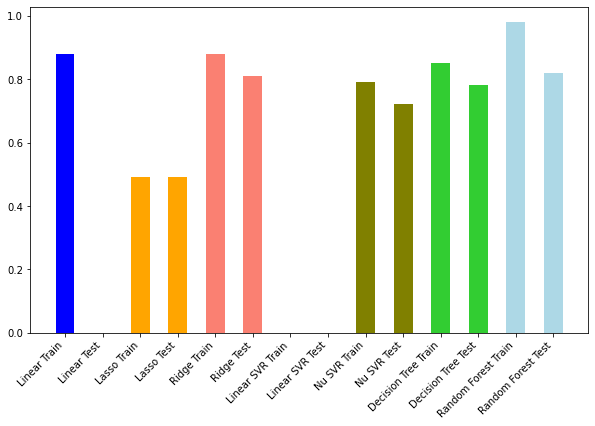

In [11]:
fig,ax = plt.subplots(figsize=(10,6))

labels = ['Linear Train','Linear Test',
         'Lasso Train','Lasso Test',
         'Ridge Train','Ridge Test',
        'Linear SVR Train','Linear SVR Test',
        'Nu SVR Train','Nu SVR Test',
         'Decision Tree Train','Decision Tree Test',
         'Random Forest Train','Random Forest Test']

# Linear
#Linear train result
linear_train_pos = 1
linear_train = model_perf_df['Train'][0]
ax.bar(linear_train_pos,linear_train,0.5,color='blue')
#Linear test result
linear_train_pos = 2
linear_train = model_perf_df['Test'][0]
ax.bar(linear_train_pos,linear_train,0.5,color='blue')
########################################################################
# Lasso
#Lasso train result
lasso_train_pos = 3
lasso_train = model_perf_df['Train'][1]
ax.bar(lasso_train_pos,lasso_train,0.5,color='orange')
#Lasso test result
lasso_train_pos = 4
lasso_train = model_perf_df['Test'][1]
ax.bar(lasso_train_pos,lasso_train,0.5,color='orange')
########################################################################
# RIdge
#ridge train result
ridge_train_pos = 5
ridge_train = model_perf_df['Train'][2]
ax.bar(ridge_train_pos,ridge_train,0.5,color='salmon')
#Lasso test result
ridge_train_pos = 6
ridge_train = model_perf_df['Test'][2]
ax.bar(ridge_train_pos,ridge_train,0.5,color='salmon')
########################################################################
# Lasso
#Lasso train result
linear_svr_train_pos = 7
linear_svr_train = model_perf_df['Train'][3]
ax.bar(linear_svr_train_pos,linear_svr_train,0.5,color='indigo')
#Lasso test result
linear_svr_train_pos = 8
linear_svr_train = model_perf_df['Test'][3]
ax.bar(linear_svr_train_pos,linear_svr_train,0.5,color='indigo')
########################################################################
# Lasso
#Lasso train result
nu_svr_train_pos = 9
nu_svr_train = model_perf_df['Train'][4]
ax.bar(nu_svr_train_pos,nu_svr_train,0.5,color='olive')
#Lasso test result
nu_svr_train_pos = 10
nu_svr_train = model_perf_df['Test'][4]
ax.bar(nu_svr_train_pos,nu_svr_train,0.5,color='olive')
########################################################################
# Lasso
#Lasso train result
dt_train_pos = 11
dt_train = model_perf_df['Train'][5]
ax.bar(dt_train_pos,dt_train,0.5,color='limegreen')
#Lasso test result
dt_train_pos = 12
dt_train = model_perf_df['Test'][5]
ax.bar(dt_train_pos,dt_train,0.5,color='limegreen')
########################################################################
# Lasso
#Lasso train result
rf_train_pos = 13
rf_train = model_perf_df['Train'][6]
ax.bar(rf_train_pos,rf_train,0.5,color='lightblue')
#Lasso test result
rf_train_pos = 14
rf_train = model_perf_df['Test'][6]
ax.bar(rf_train_pos,rf_train,0.5,color='lightblue')
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14])
ax.set_xticklabels(labels,rotation = 45,ha='right');